In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import pyodbc
import warnings

# Configure Matplotlib view
%matplotlib inline

# Suppress warnings for a clean notebook view
warnings.filterwarnings("ignore")

In [2]:
# Check ODBC driver installations
## print(pyodbc.drivers())

In [3]:
# Connect to SQL database using pyodbc
conn = pyodbc.connect(
    'Driver={ODBC Driver 17 for SQL Server};'
    'Server=localhost\\SQLEXPRESS;'
    'Database=DataWarehouse;'
    'Trusted_Connection=yes;'
)

# Introduction

Public policy discussions regarding the effects of protectionist measures are receiving the spotlight once again as the Trump administration wages a second round of trade wars in 2025. Despite political claims to the contrary, this project presents a short memo arguing that the mechanisms of the global dollar system make it unlikely that the U.S. will succeed in reversing its trade and fiscal deficits and reindustrializing its economy by imposing tariffs. Instead, Trump's trade policies may end up undermining the global dollar system by pushing foreign countries to diversify further away from dollar reserves.

# Historical background

Towards the end of World War II, the U.S. had significant influence to create a global dollar system in which international trade and financial transactions would be conducted in dollars. Leveraging its status as the sole remaining superpower with the largest share of the world's economic output and gold reserves, the U.S. argued that a single currency standard would guard against currency wars, trade barriers, and illiquid financial markets that contributed to the onset of World War II.

Under the original 1944 framework of the Bretton Woods System, the dollar was to be pegged to gold at a fixed rate of $35/oz and other currencies to the dollar. The combination of large U.S. gold reserves and the dollar's redeemability for gold initially gave credibility to the dollar as a stable currency. In the early stages of the global dollar system, the U.S. supplied the world with dollars through foreign policy programs like the Marshall Plan, where the U.S. provided financial aid and capital investments to rebuild the economic base of foreign countries destroyed by the war. Foreign countries, in turn, used these dollars to import critical items like food, machinery, and industrial materials from the U.S. 

The dollar-gold standard came under stress in the 1960s when the U.S. government chose to increase the dollar supply instead of raising taxes to finance the fiscal deficits related to the Vietnam War and the Great Society Programs. When the dollars circulating globally began exceeding the U.S. gold reserves, foreign countries began questioning whether the U.S. could credibly maintain the dollar's peg to gold. As mistrust in the U.S. grew, foreign countries started redeeming their dollar reserves for gold. To avoid depleting its gold reserves, the U.S. violated the Bretton Woods System unilaterally in 1971 when President Nixon suspended the dollar's convertibility to gold. This caused an uproar in the international community, but the world was already deeply entrenched in using the dollar by this point. 

Despite the dollar's transition from a gold-backed currency to a fiat currency, the world's reliance on the dollar became further cemented through two major developments. The first development was the 1974 introduction of the petrodollar arrangement between the U.S. and Saudia Arabia, in which the U.S. promised security guarantees to Saudia Arabia in return for Saudia Arabia agreeing to price its oil in dollars. The second development was the expansion of the Eurodollar market in which foreign banks hold dollar deposits and conduct financial transactions in dollars outside of the U.S. Together, these developments made dollar reserves essential for foreign countries to engage in international trade and financial transactions.

# Mechanisms of the global dollar system

Now that the historical background of the global dollar system has been covered, let's look at how it works today.

Starting with international trade, the percentage of trade invoiced in dollars estimates the demand for dollars to settle trade transactions. Data from 1999 to 2019 shows that around 30% - 50% of global exports and imports were invoiced in dollar, indicating that the dollar still plays a dominant role in international trade.

In [10]:
# SQL query to retrieve international trade data
query_trade = '''
SELECT 
	YEAR(year) AS year,
	flow,
	num_countries,
	total_usd / 1e12 AS total_usd,
	usd_share / 1e12 AS usd_share,
	pct_usd_share * 100 AS pct_usd_share
FROM 
	gold.imf_wb_trade_dollar_share
WHERE
	num_countries >= 20
ORDER BY
	year ASC,
	flow ASC;
'''

In [11]:
# Format year column as datetime and show only year
df_trade = pd.read_sql(query_trade, conn)

In [12]:
# Dollars in billions
df_trade.head();

In [13]:
# Set x-tick increments to show every 5th year
min_year = df_trade['year'].min()
max_year = df_trade['year'].max()
years_to_show = np.arange(min_year, max_year + 1, 5)

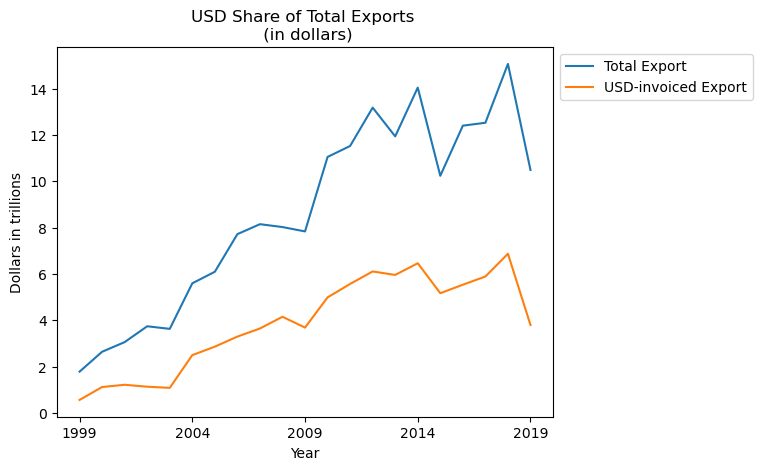

In [14]:
# Instantiate figure and axis
fig1_export, ax1_export = plt.subplots(figsize = (6.4, 4.8))

# Plot lines for export values
sns.lineplot(data = df_trade[df_trade['flow'] == 'Export'], x = 'year', y = 'total_usd', 
             ax = ax1_export, label = 'Total Export'
            )

sns.lineplot(data = df_trade[df_trade['flow'] == 'Export'], x = 'year', y = 'usd_share', 
             ax = ax1_export, label = 'USD-invoiced Export'
            )

# Plot formatting
ax1_export.set_title('USD Share of Total Exports \n (in dollars)')
ax1_export.set_xlabel('Year')
ax1_export.set_ylabel('Dollars in trillions')
ax1_export.set_xticks(years_to_show)
ax1_export.set_xticklabels(years_to_show)
ax1_export.legend(loc = 'upper left', bbox_to_anchor = (1, 1));

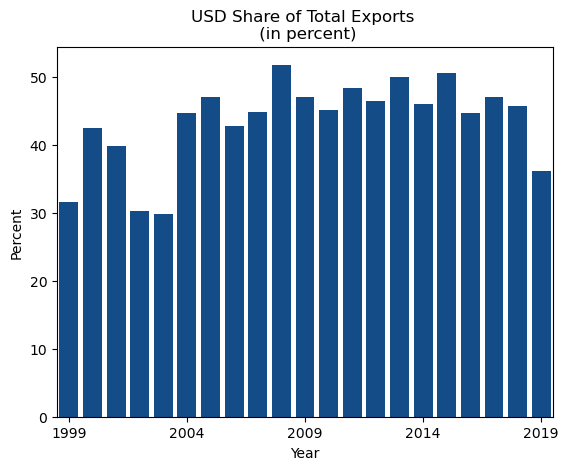

In [15]:
# Instantiate figure and axis
fig2_export, ax2_export = plt.subplots(figsize = (6.4, 4.8))

# Plot horizontal bars for USD export percent
sns.barplot(data = df_trade[df_trade['flow'] == 'Export'], x = 'year', y = 'pct_usd_share', 
            ax = ax2_export, color = '#004C99');

# Plot formatting
ax2_export.set_title('USD Share of Total Exports \n (in percent)')
ax2_export.set_xlabel('Year')
ax2_export.set_ylabel('Percent')
ax2_export.xaxis.set_major_locator(ticker.MultipleLocator(5));

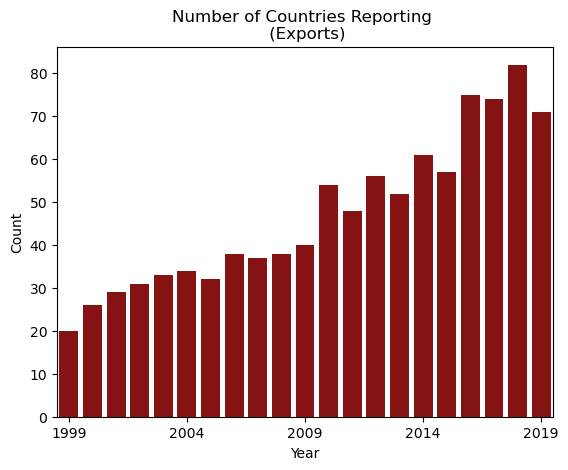

In [16]:
# Instantiate figure and axis
fig3_export, ax3_export = plt.subplots(figsize = (6.4, 4.8))

# Plot horizontal bars for number of countries reporting
sns.barplot(data = df_trade[df_trade['flow'] == 'Export'], x = 'year', y = 'num_countries',
            ax = ax3_export, color = '#990000');

# Plot formatting
ax3_export.set_title('Number of Countries Reporting \n (Exports)')
ax3_export.set_xlabel('Year')
ax3_export.set_ylabel('Count')
ax3_export.xaxis.set_major_locator(ticker.MultipleLocator(5));

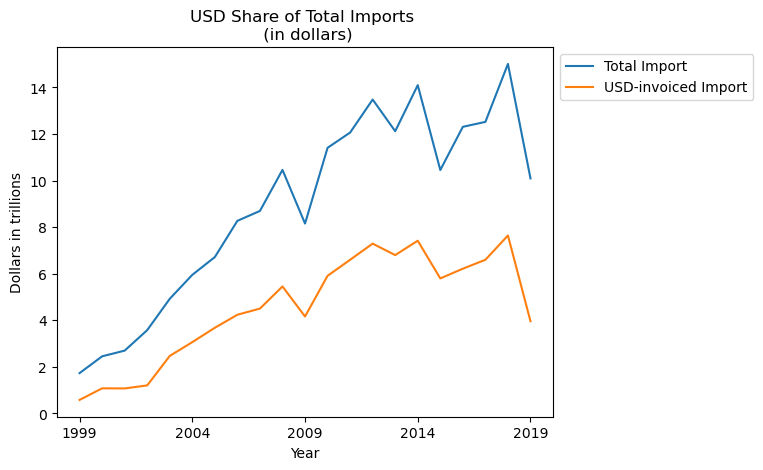

In [17]:
# Instantiate figure and axis
fig1_import, ax1_import = plt.subplots(figsize = (6.4, 4.8))

# Plot lines for export values
sns.lineplot(data = df_trade[df_trade['flow'] == 'Import'], x = 'year', y = 'total_usd', 
             ax = ax1_import, label = 'Total Import'
            )

sns.lineplot(data = df_trade[df_trade['flow'] == 'Import'], x = 'year', y = 'usd_share', 
             ax = ax1_import, label = 'USD-invoiced Import'
            )

# Plot formatting
ax1_import.set_title('USD Share of Total Imports \n (in dollars)')
ax1_import.set_xlabel('Year')
ax1_import.set_ylabel('Dollars in trillions')
ax1_import.set_xticks(years_to_show)
ax1_import.set_xticklabels(years_to_show)
ax1_import.legend(loc = 'upper left', bbox_to_anchor = (1, 1));

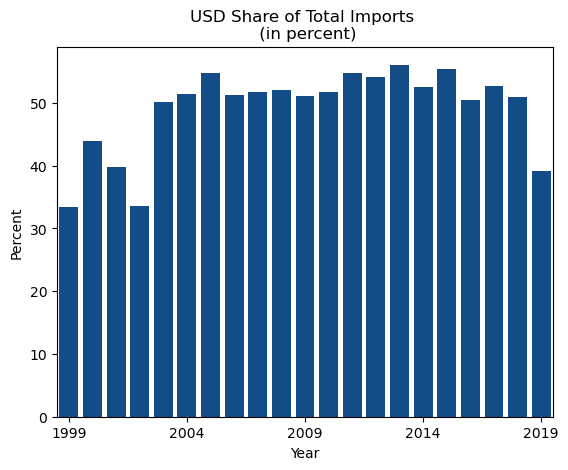

In [18]:
# Instantiate figure and axis
fig2_import, ax2_import = plt.subplots(figsize = (6.4, 4.8))

# Plot horizontal bars for USD import percent
sns.barplot(data = df_trade[df_trade['flow'] == 'Import'], x = 'year', y = 'pct_usd_share',
            ax = ax2_import, color = '#004C99');

# Plot formatting
ax2_import.set_title('USD Share of Total Imports \n (in percent)')
ax2_import.set_xlabel('Year')
ax2_import.set_ylabel('Percent')
ax2_import.xaxis.set_major_locator(ticker.MultipleLocator(5));

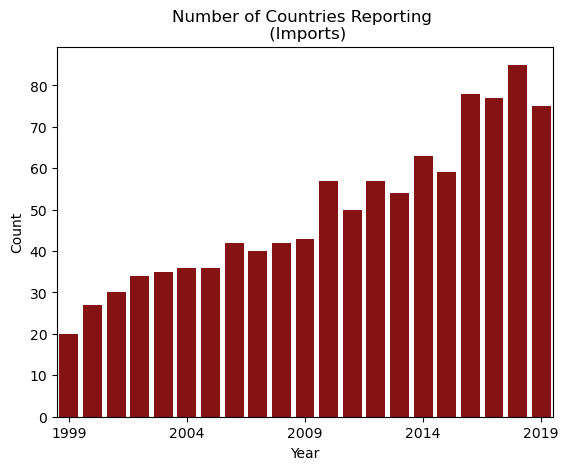

In [19]:
# Instantiate figure and axis
fig3_Import, ax3_Import = plt.subplots(figsize = (6.4, 4.8))

# Plot horizontal bars for number of countries reporting
sns.barplot(data = df_trade[df_trade['flow'] == 'Import'], x = 'year', y = 'num_countries', 
            ax = ax3_Import, color = '#990000');

# Plot formatting
ax3_Import.set_title('Number of Countries Reporting \n (Imports)')
ax3_Import.set_xlabel('Year')
ax3_Import.set_ylabel('Count')
ax3_Import.xaxis.set_major_locator(ticker.MultipleLocator(5));

As aforementioned, foreign countries must hold dollar reserves for international trade settlement. The chart below shows that the dollar continues to make up a dominant proportion of the world's disclosed official reserves despite the emergence of competitor currencies like the Euro.

In [21]:
query_reserves = '''
SELECT
	YEAR(year) AS year,
    country,
    currency,
    value_usd / 1e9 AS value_usd,
    pct_yr_total * 100 AS pct_yr_total
FROM
	gold.imf_reserves_world
'''

In [22]:
df_reserves = pd.read_sql(query_reserves, conn)

In [23]:
df_reserves.head();

In [24]:
df_reserves_pivot = df_reserves.pivot(index = 'year', columns = 'currency', values = 'value_usd')

In [25]:
df_reserves_pivot.head();

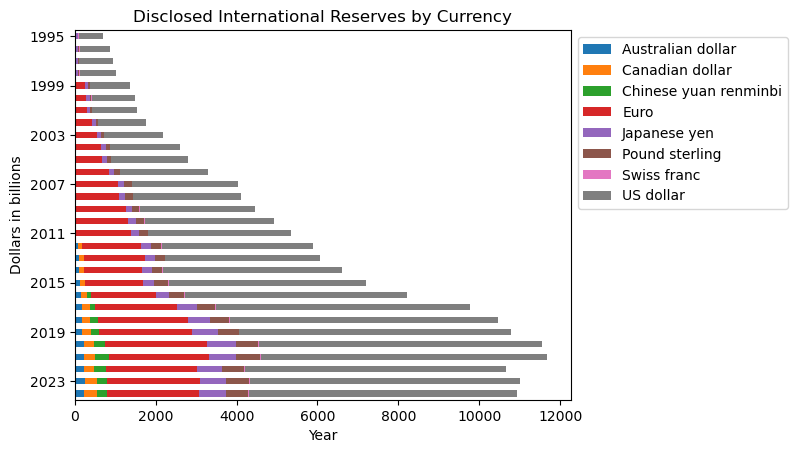

In [26]:
# Instantiate figure and axis
fig1_reserves, ax1_reserves = plt.subplots(figsize = (6.4, 4.8))

# Plot stacked bar charts showing reserves by currency over time
df_reserves_pivot.plot(kind = 'barh', stacked = True, ax = ax1_reserves)

# Plot formatting
ax1_reserves.set_title('Disclosed International Reserves by Currency')
ax1_reserves.set_ylabel('Dollars in billions')
ax1_reserves.set_xlabel('Year')
ax1_reserves.invert_yaxis()
ax1_reserves.yaxis.set_major_locator(ticker.MultipleLocator(4))
ax1_reserves.legend(loc = 'upper left', bbox_to_anchor = (1, 1));

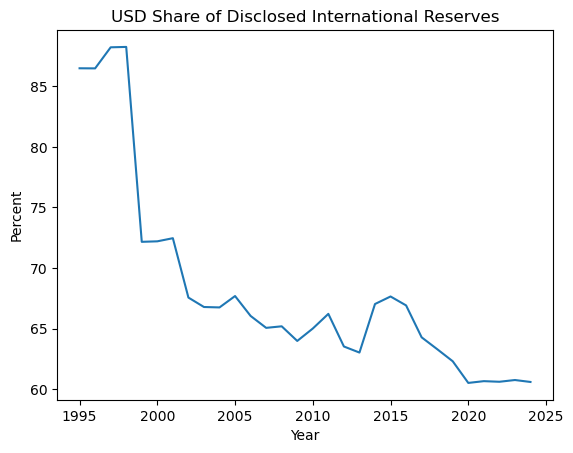

In [27]:
# Instantiate figure and axis
fig2_reserves, ax2_reserves = plt.subplots(figsize = (6.4, 4.8))

# Plot lines for USD share of global reserves
sns.lineplot(data = df_reserves[df_reserves['currency'] == 'US dollar'], x = 'year', y = 'pct_yr_total',
            ax = ax2_reserves)

# Plot formatting
ax2_reserves.set_title('USD Share of Disclosed International Reserves')
ax2_reserves.set_xlabel('Year')
ax2_reserves.set_ylabel('Percent');

One important thing to note about the current global dollar system is that the mechanism through which the U.S. supplies the world with dollars has changed since the Bretton Woods period. With foreign countries having rebuilt their economies after World War II, dollars no longer primarily flow out to the world through U.S. financial aid and capital investments. Instead, the U.S. runs persistent trade deficits to provide dollar outflows to foreign countries that export to the U.S. Historical U.S. current account data indicates that U.S. imports have increasingly exceeded U.S. exports starting in the 1980s.

In [29]:
query_bop = '''
SELECT
	YEAR(year) AS year,
    country,
    country_code,
    bop_account,
    value_usd / 1e9 AS value_usd
FROM
	gold.imf_bop_usa
;
'''

In [30]:
df_bop = pd.read_sql(query_bop, conn)

In [31]:
# value_usd in billions
df_bop.head();

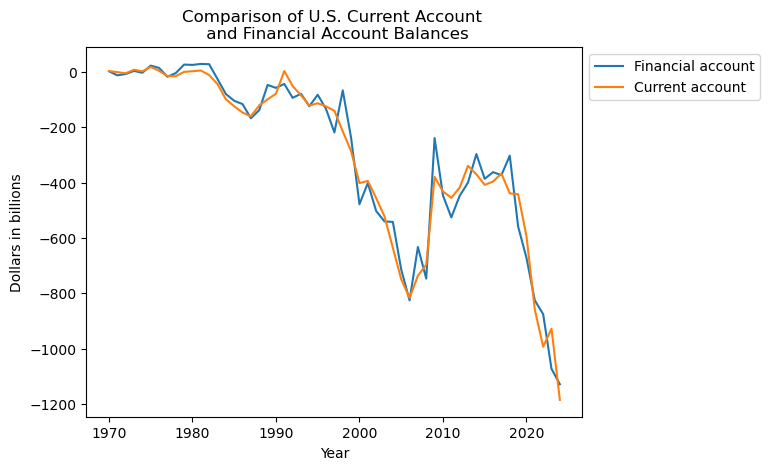

In [32]:
# Instantiate figure and axis
fig1_financial, ax1_financial = plt.subplots(figsize = (6.4, 4.8))

# Plot lines for current account and financial account values
sns.lineplot(data = df_bop[df_bop['bop_account'].isin(['Current account', 'Financial account'])], 
             x = 'year', y = 'value_usd', hue = 'bop_account', ax = ax1_financial)

# Plot formatting
ax1_financial.set_title('Comparison of U.S. Current Account \n and Financial Account Balances')
ax1_financial.set_xlabel('Year')
ax1_financial.set_ylabel('Dollars in billions')
ax1_financial.legend(loc='upper left', bbox_to_anchor=(1, 1));

A key driving force behind the U.S. trade deficits is the outsourcing of American manufacturing capacity that started accelerating in the 1980s. The Reagan era was characterized by the adoption of neoliberal economic ideology, which emphasized free trade and market deregulation. Under this political environment, American manufacturing companies seeking low labor costs aggressively moved their operations overseas. At the same time, the U.S. economy started becoming increasingly financialized as Wall Street became the center of global capital flows. The charts below show that the financial sector (defined here as a combination of finance, insurance, real estate, rental, and leasing) overtook the manufacturing sector's share of U.S. GDP in the late 1980s as overall U.S. GDP started growing exponentially. As of 2024, the financial sector makes up more than 20% of U.S. GDP whereas the manufacturing sector makes up less than 10%.

In [34]:
query_sectors = '''
SELECT
	YEAR(year) AS year,
    country,
    country_code,
    sector,
    value_usd / 1e9 AS value_usd
FROM
	gold.nea_gdp_sectors_usa;
'''

In [35]:
query_sectors_pct = '''
SELECT
	YEAR(year) AS year,
	SUM(CASE WHEN sector = 'Financial' THEN value_usd ELSE 0 END) / 
		SUM(CASE WHEN sector = 'GDP' THEN value_usd ELSE 0 END) * 100 AS financial_share,
	SUM(CASE WHEN sector = 'Manufacturing' THEN value_usd ELSE 0 END) / 
		SUM(CASE WHEN sector = 'GDP' THEN value_usd ELSE 0 END) * 100 AS manufacturing_share
FROM
	gold.nea_gdp_sectors_usa
GROUP BY
	year
ORDER BY 
	year ASC;
'''

In [36]:
# Dollars in billions
df_sectors = pd.read_sql(query_sectors, conn)

In [37]:
df_sectors.head();

In [38]:
df_sectors_pct = pd.read_sql(query_sectors_pct, conn)

In [39]:
df_sectors_pct = pd.melt(frame = df_sectors_pct, 
                         id_vars = 'year', value_vars = ['financial_share', 'manufacturing_share'],
                         var_name = 'sector', value_name = 'pct_of_gdp'
                        )

In [40]:
df_sectors_pct.head();

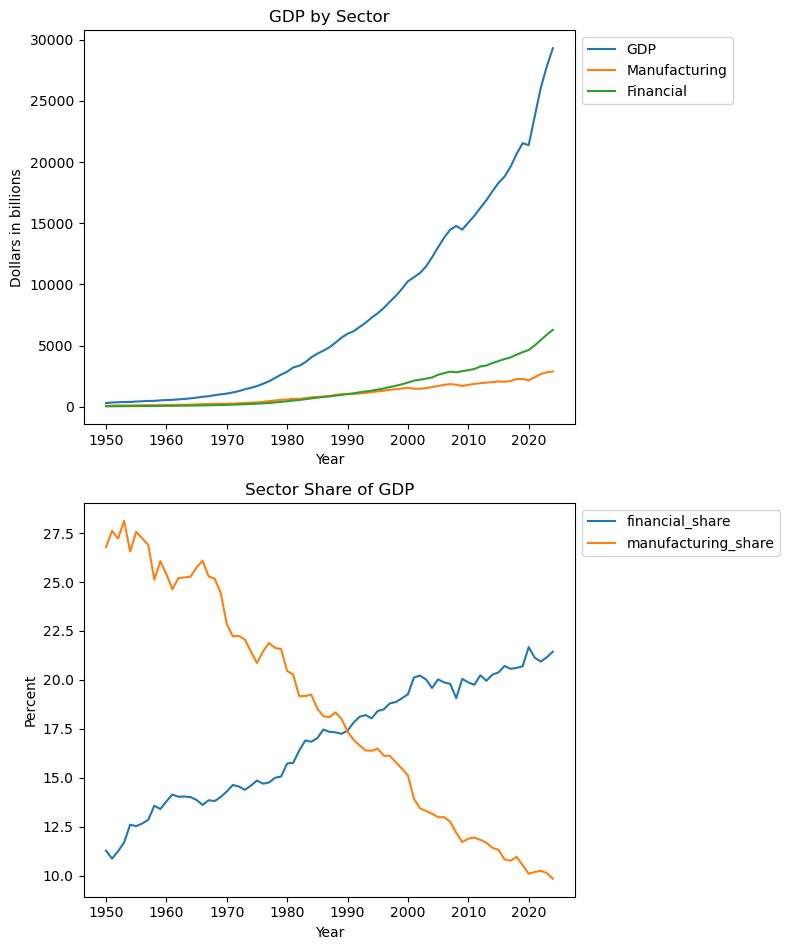

In [41]:
# Instantiate figure and axis
fig1_sectors, ax1_sectors = plt.subplots(nrows = 2, ncols = 1, figsize = (8, 4.8 * 2))

# Plot GDP by sector lines
sns.lineplot(data = df_sectors, x = 'year', y = 'value_usd', hue = 'sector', ax = ax1_sectors[0])

# Plot sector share of GDP lines
sns.lineplot(data = df_sectors_pct, x = 'year', y = 'pct_of_gdp', hue = 'sector', ax = ax1_sectors[1])


# Plot formatting
title_list_2 = ['GDP by Sector',
              'Sector Share of GDP'
             ]

y_list_2 = ['Dollars in billions', 'Percent']

for i in range(len(title_list_2)):
    ax1_sectors[i].set_title(f'{title_list_2[i]}')
    ax1_sectors[i].set_xlabel('Year')
    ax1_sectors[i].set_ylabel(f'{y_list_2[i]}')
    ax1_sectors[i].legend(loc = 'upper left', bbox_to_anchor = (1, 1))

plt.tight_layout();

However, the U.S. isn't making a one-sided sacrifice in incurring persistent trade deficits to supply the world with dollars. The previous chart showing historical U.S. current account data also shows historical U.S. financial account data, which indicates that dollar outflows from U.S. trade deficits are largely offset by foreign dollar inflows to the U.S. financial markets. For example, the chart below shows that a significant chunk of these foreign dollar inflows consist of U.S. treasury purchases that fund the federal government.

In [43]:
query_treasuries = '''
SELECT
	YEAR(year) AS year,
    country,
    country_code,
    source,
    value_usd / 1e9 AS value_usd
FROM
	gold.fred_treasuries_consolidated_usa
WHERE
	source IN ('Domestic', 'Foreign');
'''

In [44]:
# Dollars in billions
df_treasuries = pd.read_sql(query_treasuries, conn)

In [45]:
df_treasuries.head();

In [46]:
df_treasuries_pivot = df_treasuries.pivot(index = 'year', columns = 'source', values = 'value_usd')

In [47]:
df_treasuries_pivot.head();

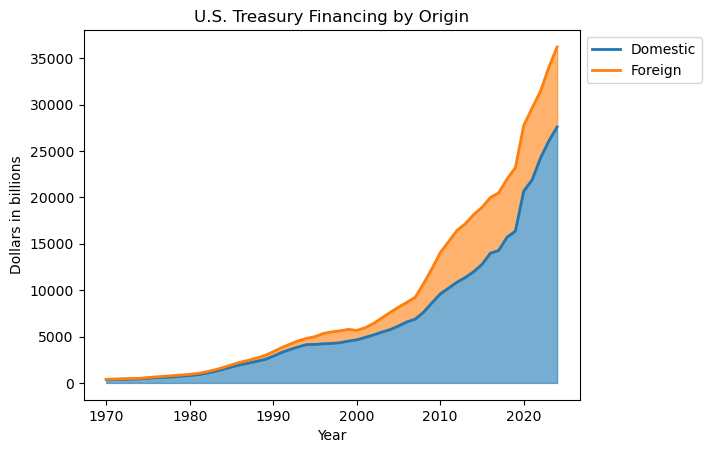

In [48]:
# Instantiate figure and axis
fig1_treasuries, ax1_treasuries = plt.subplots(figsize=(6.4, 4.8))

# Plot stacked bar charts showing Treasuries financed by source
df_treasuries_pivot.plot(kind='line', stacked=True, ax=ax1_treasuries, linewidth=2)

# Get the y-values (stacked values) and colors used in the plot
colors = [line.get_color() for line in ax1_treasuries.lines]
y_values = df_treasuries_pivot.cumsum(axis=1) 

# First, fill the area under the lowest line
ax1_treasuries.fill_between(y_values.index, 0, y_values.iloc[:, 0], color = colors[0], alpha = 0.6)

# Then fill the area between each pair of stacked lines
for i in range(1, len(y_values.columns)):
    ax1_treasuries.fill_between(y_values.index, y_values.iloc[:, i-1], y_values.iloc[:, i], 
                                color=colors[i], alpha=0.6)

# Plot formatting
ax1_treasuries.set_title('U.S. Treasury Financing by Origin')
ax1_treasuries.set_xlabel('Year')
ax1_treasuries.set_ylabel('Dollars in billions')
ax1_treasuries.legend(loc='upper left', bbox_to_anchor=(1, 1));

The modern global dollar system thus creates circular dollar flows similar to its counterpart from the Bretton Woods period. These foreign dollar inflows keep borrowing costs low in the U.S., facilitate credit-driven economic growth, and enable Americans to consume and invest in excess of U.S. domestic income.

# Policy problems arising from the global dollar system

## Structural deficits and growing debt

While the global dollar system provides many benefits to the U.S., it is not without problems. One major problem is that it makes trade and fiscal deficits a structural feature of the U.S. economy, which in turn leads to growing U.S. debt. To understand how this works, let's look at the link between U.S. domestic net savings and trade deficits.

With some macroeconomic theory, it can be shown that:

$\text{Private net savings} + \text{Government budget balance} = \text{Trade balance}$

By defining the following equality:

$\text{Private net savings} + \text{Government budget balance} = \text{Domestic net savings}$

It can be shown that:

$\text{Domestic net savings} = \text{Trade balance}$

Given that the U.S. must run persistent trade deficits to supply the world with dollars, one of three scenarios must occur:

<div style="display: inline-block; text-align: left;">
 
|Scenario 1|
|----------|
|Private net savings is negative (i.e., private sector consumes and invests more than its after-tax disposable income)|
|Government runs a budget surplus (i.e., government takes in more tax revenue than it spends)|
|Government budget surplus isn't large enough to offset negative private net savings|
|Domestic net savings is negative|

</div>

<div style="display: inline-block; text-align: left;">
    
|Scenario 2|
|----------|
|Private net savings is positive  (i.e., private sector consumes and invests less than its after-tax disposable income)|
|Government runs a budget deficit (i.e., government spends more than its tax revenue)|
|Private net savings aren't large enough to offset the government budget deficit|
|Domestic net savings is negative|

</div>

<div style="display: inline-block; text-align: left;">

|Scenario 3|
|----------|
|Private net savings is negative (i.e., private sector consumes and invests more than its after-tax disposable income)|
|Government runs a budget deficit (i.e., government spends more than its tax revenue)|
|Domestic net savings is negative|

</div>

The prevailing historical trend in the U.S. has been Scenario 2, where the government budget deficits have consistently exceeded private net savings. This makes sense since the private sector cannot indefinitely spend more than it earns without running into credit problems. The U.S. government, on the other hand, has the sovereign power to issue debt in a currency that it controls, reinforced by the perpetual foreign demand for dollar reserves coming from the global dollar system. The end result is that the U.S. spends more than it saves by financing the gap using savings from the rest of the world.

In [53]:
query_savings = '''
SELECT
	YEAR(year) AS year,
    country,
    country_code,
    source,
    value_usd / 1e9 AS value_usd
FROM
	gold.fred_savings_consolidated_usa;
'''

In [54]:
# Dollars in billions
df_savings = pd.read_sql(query_savings, conn)

In [55]:
df_savings.head();

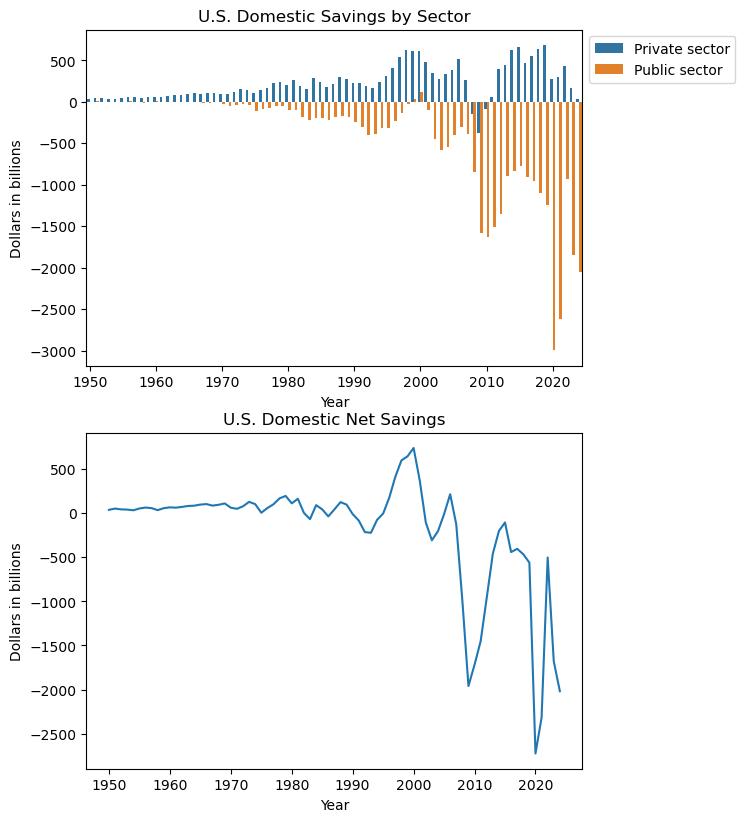

In [56]:
# Instantiate figure and axis
fig1_sector, ax1_sector = plt.subplots(nrows = 2, ncols = 1, figsize = (6.4, 4.8 * 2))

# Plot stacked bar chart showing savings by sector
sns.barplot(data = df_savings[df_savings['source'].isin(['Private sector', 'Public sector'])], 
            x = 'year', y = 'value_usd', hue = 'source', ax = ax1_sector[0])

# Plot line chart showing U.S. net savings
sns.lineplot(data = df_savings[df_savings['source'] == 'Net'], 
            x = 'year', y = 'value_usd', ax = ax1_sector[1])

# Bar chart formatting

## Set x-tick increments to show every 5th year
min_year_savings = df_savings['year'].min()
max_year_savings = df_savings['year'].max()
years_to_show_savings = np.arange(min_year_savings, max_year_savings + 1, 5)

ax1_sector[0].set_title('U.S. Domestic Savings by Sector')
ax1_sector[0].set_xlabel('Year')
ax1_sector[0].set_ylabel('Dollars in billions')
ax1_sector[0].xaxis.set_major_locator(ticker.MultipleLocator(10))
ax1_sector[0].legend(loc = 'upper left', bbox_to_anchor = (1, 1))

# Line chart formatting
ax1_sector[1].set_title('U.S. Domestic Net Savings')
ax1_sector[1].set_xlabel('Year')
ax1_sector[1].set_ylabel('Dollars in billions');

Unconstrained by the fiscal limitations of other countries lacking reserve currency status, the U.S. debt started ballooning without guardrails. The U.S. government's lack of fiscal discipline generates significant controversy with both domestic and foreign critics, who protest that they are held captive to subsidizing unpopular U.S. policies like wars. Despite the inherent conflicts of interest that are built into the global dollar system, the dollar's dominance has allowed the U.S. to finance its debt at relatively low interest rates without running into a fiscal crisis so far. The charts below show that the historical 10-year yield for U.S. debt has been comparable to those of other similar advanced countries, whereas countries like Greece, India, and Spain that have either experienced fiscal/financial crises or are emerging economies have had to endure much higher cost of debt.

In [58]:
query_yield_advanced = '''
SELECT
	YEAR(year) AS year,
    country,
    ten_year_yield
FROM
	gold.fred_yield_consolidated_world
WHERE
    country IN ('France', 'Germany', 'Japan', 'UK', 'USA')
'''

In [59]:
query_yield_distress = '''
SELECT
	YEAR(year) AS year,
    country,
    ten_year_yield
FROM
	gold.fred_yield_consolidated_world
WHERE
    country IN ('Greece', 'India', 'Spain', 'USA')
'''

In [60]:
query_yield_russia = '''
SELECT
	YEAR(year) AS year,
    country,
    ten_year_yield
FROM
	gold.fred_yield_consolidated_world
WHERE
    country IN ('Russia', 'USA')
'''

In [61]:
dict_yield = {'Advanced': pd.read_sql(query_yield_advanced, conn),
              'Distress': pd.read_sql(query_yield_distress, conn),
              'Russia': pd.read_sql(query_yield_russia, conn)
             }

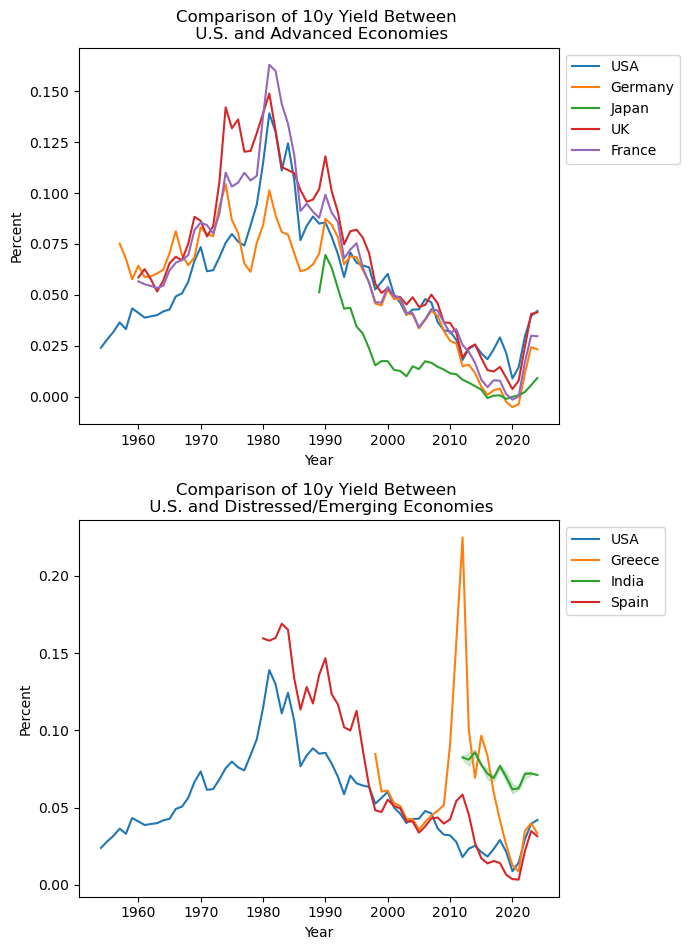

In [62]:
# Instantiate figure and axis
fig1_yield, ax1_yield = plt.subplots(nrows = 2, ncols = 1, figsize = (7, 4.8 * 2))

# Plot lines comparing 10y yield of advanced countries to U.S.
sns.lineplot(data = dict_yield['Advanced'], x = 'year', y = 'ten_year_yield', hue = 'country', ax = ax1_yield[0])

# Plot lines comparing 10y yield of distressed countries to U.S.
sns.lineplot(data = dict_yield['Distress'], x = 'year', y = 'ten_year_yield', hue = 'country', ax=  ax1_yield[1]);


# Plot formatting
title_list_1 = ['Comparison of 10y Yield Between \n U.S. and Advanced Economies',
              'Comparison of 10y Yield Between \n U.S. and Distressed/Emerging Economies'
             ]

for i in range(len(title_list_1)):
    ax1_yield[i].set_title(f'{title_list_1[i]}')
    ax1_yield[i].set_xlabel('Year')
    ax1_yield[i].set_ylabel('Percent')
    ax1_yield[i].legend(loc = 'upper left', bbox_to_anchor = (1, 1))

plt.tight_layout();

However, there are rising concerns about the U.S. government's ability to perpetually borrow into the future at low interest rates. On the domestic front, several issues have been identified including the loss of fiscal flexibility due to increasing interest expense, reduced financial sector capacity to absorb U.S. Treasuries due to regulatory capital requirements, U.S. sovereign credit rating downgrades, and periods of acute Treasury market volatility. On the international front, stresses such as geopolitical conflicts with the U.S. (e.g., South China Sea), American weaponization of the global dollar system (e.g., U.S. freezing Russia's dollar reserves at the onset of the Ukraine War), and the Trump administration's trade war are pushing foreign countries to diversify away from holding their dollar reserves in U.S. treasuries. Notable examples include BRICS member countries exploring bilateral trade settlements in their own currencies and China building a renminbi-based alternative to the global dollar payment system.

## Why Trump's trade policies are unlikely to reduce U.S. deficits and debt

Shifting the focus to recent U.S. trade policies, the Trump administration has been presenting its tariffs as a panacea that will reverse the U.S. trade and fiscal deficits and help pay down America's $38 trillion debt while preserving the global dollar system. However, carefully walking through the relationship between domestic net savings, trade balance, and financial flows suggests that such political claims are dubious. In order for the tariffs to have the purported effect, the following scenarios will likely have to unfold:

1. **U.S. private net savings:** Assuming that the U.S. government doesn't want its trade policies to trigger a recession, either Americans must consume and invest less at current GDP levels or GDP growth must be large enough to outpace consumption and investment such that U.S. private net savings increase.  

2. **U.S. government budget balance:** Tariff revenues must be large enough to meaningfully offset the U.S. fiscal deficit. Taking into account the expected loss in U.S. tax revenues from the Trump tax cuts, a greater burden falls upon tariff revenues to cover U.S. fiscal spending that is expected to grow over time. 

3.  **U.S. domestic net savings:** The sum of U.S. private net savings and government budget balance must be positive, resulting in positive U.S. domestic net savings.

4. **Trade balance:** U.S. exports must exceed imports.

5. **Financial flows:** Dollars accumulated through positive U.S. domestic net savings must flow out of the U.S. to supply the world with dollars, similar to how the global dollar system did during the Bretton Woods period.

A quick review of the data casts doubts on the feasibility of these scenarios. Looking back at the U.S. domestic net savings data, annual U.S. fiscal deficits have ranged from about \\$1 trillion to \\$3 trillion while the maximum U.S. private net saving was about \\$685 billion over the past 10 years. Unless a major change occurs to Americans' propensity to save, a crude best case scenario estimate indicates that tariffs must generate at least \\$315 billion to \\$2.3 trillion annually for the U.S. government, with the higher end of the estimate being more likely given the state of U.S. fiscal policies. In the meanwhile, annual U.S. imports have ranged from \\$2 trillion to \\$4 trillion over the past 10 years. This suggests that the U.S. government would have to impose a tariff rate ranging from 50% to 100% under recent international trade trends just to reach a neutral trade balance and fiscal balance! When potential complicating factors like foreign retaliatory protectionist policies, reduction in international trade, and U.S. economic disruption from loss of critical imports are taken into account, it quickly becomes apparent that the U.S. is unlikely to reverse its trade and fiscal deficits, let alone pay down the \\$38 trillion national debt. Further, even if the U.S. were to somehow generate positive domestic net savings and a trade surplus, it is unclear how the dollar outflows required to preserve the global dollar system are compatible with Trump's "America First" policies that frown upon foreign aid and overseas capital investments. This suggests that the Trump administration is either using flawed economic logic or knowingly making false claims for political gain.

## Obstacles to U.S. reindustrialization 

Another major focus of recent U.S. administrations has been strategic domestic reindustrialization to hedge against China's growing international influence. Recently, the Trump administration has taken a two-prong approach to accomplishing this objective:

1. Use tariffs to reshore American manufacturing operations overseas
2. Use tariffs as a negotiation tool to pressure foreign allies to invest in U.S. domestic manufacturing 

Regarding the first approach, recent public reports suggest that tariffs have thus far provided mixed results in reshoring American manufacturing operations overseas. For example, some companies in more capital-intensive sectors have conveyed that they are choosing to return home because tariffs outweigh production cost savings from operating overseas. On the other hand, some companies in more labor-intensive sectors have indicated that they are facing a quandary because the increase in production costs from moving back home are prohibitively high even after accounting for tariffs. In addition to these anecdotal accounts, there are other complicating factors to take into account. For instance, given that American corporate interests have gotten accustomed to nearly five decades of neoliberal economic thinking, it is uncertain whether they will all remain politically complicit with the Trump administration's protectionist policies if their profit margins are squeezed. Further, it remains to be seen how extensively companies returning home will maximize automation to save production costs, thereby undermining the Trump administration's campaign promises of job creation and economic prosperity for the American working class.   

Moving on to the second approach, there are signs that the Trump administration's heavy-handed negotiation approach are straining diplomatic relations and making foreign allies increasingly cautious when investing in U.S. domestic manufacturing. For example, in a controversial incident that occurred on November 2025, South Korean workers building a Hyundai manufacturing site near Savannah, Georgia were raided, shackled, and detained by U.S. Immigration and Customs Enforcement agents while the two countries were negotiating the terms of South Korea's investment commitments to American manufacturing. Investigations into the incident highlighted several practical problems, such as the need to reform U.S. work visa programs, foreign resistance to transferring proprietary technical knowledge and skills, language barriers, and growing anti-American sentiments overseas. While foreign allies are still ultimately likely to comply with American demands in the near term to preserve tariff-exempt access to the U.S. markets, long-term progress towards reindustrializing the U.S. may become hindered as foreign allies become more apprehensive about navigating the politically-charged business environment in the U.S. In addition, foreign allies may accelerate the worldwide diversification away from the global dollar system if they perceive that U.S. trade policies pose growing political risk.